# Analisis del campo 'banos'

## Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Configuraciones

### Configuraciones librerias

In [2]:
%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams['figure.figsize'] = (18, 8)

sns.set(style="whitegrid", font_scale = 2) # seteando tipo de grid en seaborn
                                           # seteando tamanio de ticks label
pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

### Configuraciones plot

In [3]:
TAM_TITULO = 35
TAM_ETIQUETA = 30
COLORES_BARRAS = 'colorblind'

## Funciones auxiliares 

### Funciones estadisticas 

In [4]:
def cuantil_1(serie):
    """
    PRE: Recibe una serie (pandas.Series) .
    POST: Devuelve el cuantil 3 (75%) de la 
    serie recibida .
    """
    return serie.quantile(0.25)

def cuantil_3(serie):
    """
    PRE: Recibe una serie (pandas.Series) .
    POST: Devuelve el cuantil 3 (75%) de la 
    serie recibida .
    """
    return serie.quantile(0.75)

def value_counts_normalize_porcentual(serie):
    """
    PRE: Recibe una serie (pandas.Series).
    POST: Devuelve el porcentaje que 
    representa cada valor en el conjunto 
    total de la serie.
    """
    return serie.value_counts(normalize = True) * 100

### Funciones plot 

In [5]:
def agregar_serie_boxplot(boxplot, serie, color = 'b', desplazamiento_x = 0, desplazamiento_y = 0):
    """
    PRE: Recibe: 
        un boxplot (seaborn.boxplot);
        una serie (pandas.Series) ordenada por 
        fila segun se hayan creado las barras 
        del boxplot para el dataframe de donde 
        proviene la misma;
        un color (string);
        Opcionalmente:
            un desplazamiento en x, y (float)
    POST: Coloca los valores de la serie recibida, 
    en el boxplot, haciendolos coincidir con el 
    xtick que le corresponde a cada valor.
    Los desplazamientos en x e y sirven para 
    terminar de ajustar su posicion.
    Devuelve el boxplot ya configurado.
    """
    posiciones = range(serie.count())
    for pos, xtick in zip(posiciones, boxplot.get_xticks()):
        boxplot.text(
            xtick + desplazamiento_x, 
            serie.get_values()[pos] + desplazamiento_y, 
            serie.get_values()[pos],
            horizontalalignment = 'center', 
            color = color
        )
    return boxplot

def setear_titulos_plot(plot, titulo, etiqueta_x, etiqueta_y):
    """
    PRE: Recibe:
        un plot (seaborn.<algun>plot);
        el titulo del plot (string)
        las etiquetas (string) de los ejes x e y.
    POST: Setea los titulos y etiquetas en el plot, 
    con una escale de letra especificada por las 
    constantes:
        TAM_TITULO,
        TAM_ETIQUETA
    """
    plot.set_title(titulo, fontsize = TAM_TITULO)
    plot.set_xlabel(etiqueta_x, fontsize = TAM_ETIQUETA)
    plot.set_ylabel(etiqueta_y, fontsize = TAM_ETIQUETA)

## Carga optimizada del set de datos

In [6]:
zona_prop = pd.read_csv('train.csv', \
       dtype = { \
                'id' : np.int32, \
                'tipodepropiedad' : 'category', \
                'provincia' : 'category', \
                'ciudad' : 'category', \
                'antiguedad' : np.float16, \
                'habitaciones' : np.float16, \
                'garages' : np.float16, \
                'banos' : np.float16, \
                'metroscubiertos' : np.float16, \
                'metrostotales' : np.float16, \
                'idzona' : np.float32, \
                'gimnasio' : 'bool', \
                'usosmultiples' : 'bool', \
                'piscina' : 'bool', \
                'escuelascercanas' : 'bool', \
                'centroscomercialescercanos' : 'bool', \
                'precio' : np.float32 \
               },
        parse_dates = ['fecha'],
        date_parser = pd.to_datetime                                
    )

## Banos 

### ¿Que es banos? 

In [7]:
zona_prop['banos'].unique()

array([ 2.,  1.,  3., nan,  4.])

In [8]:
zona_prop['banos'].dtype

dtype('float16')

### ¿Cuantos datos tiene el campo bano limpio? 

In [9]:
cant_banos_nan = zona_prop['banos'].isnull().sum()
cant_banos_nan

26221

### ¿Cuantos datos perdemos si descartamos todos los banos nan? 

In [10]:
cant_banos_nan / zona_prop.shape[0]

0.10925416666666667

Perdemos aprox. el 11 % de los datos del set. 

In [11]:
zona_banos = zona_prop.copy()
zona_banos = zona_banos.dropna(subset = ['banos'])
zona_banos['banos'].isnull().sum()

0

Ahora podemos convertir la columna de baños a int, pues los valores decimales no nos importan

In [12]:
zona_banos['banos'] = zona_banos['banos'].astype(np.int8) 
zona_banos['banos'].dtype

dtype('int8')

## Banos - Metroscubiertos 

### ¿Que es metros cubiertos?

In [13]:
zona_banos['metroscubiertos'].unique()

array([ 80., 268., 144.,  63.,  95.,  75., 140., 293.,  58., 100., 256.,
       170., 250., 180., 210., 133., 181., 179., 280., 258., 150.,  40.,
        nan,  88., 143., 292., 346., 300., 303., 146.,  78.,  84.,  90.,
       262., 156., 160.,  68.,  98.,  47.,  57., 285.,  79., 175., 340.,
        61., 167., 220., 405.,  46., 350., 355.,  71.,  76., 122., 108.,
       247.,  89., 228., 396., 264., 367., 164., 130.,  39., 161., 216.,
        83., 385., 196., 120., 171., 141., 106., 254.,  86.,  55., 135.,
       277., 110., 115., 177.,  70., 430., 189., 111.,  51., 155.,  65.,
       225., 265.,  60., 102.,  49., 138., 270., 278., 131., 208., 245.,
       269., 154., 125., 295., 211., 188., 230.,  66., 310., 113., 330.,
       226., 233.,  96.,  59.,  54., 152., 360., 195., 173., 234.,  53.,
       201., 193., 117., 351., 145.,  72., 260., 139.,  62., 198., 127.,
       206.,  77., 322., 417., 192.,  64.,  97., 382., 222.,  94., 137.,
       183., 246., 199., 153., 128., 147., 271., 10

### ¿Cuantos metroscubiertos del set restante estan limpios? 

In [14]:
cant_banos_no_nan_metroscubiertos_nan = zona_banos['metroscubiertos'].isnull().sum()
cant_banos_no_nan_metroscubiertos_nan

6604

### ¿Cuantos datos perdemos si descartamos metroscubiertos NaN? 

In [15]:
(cant_banos_nan + cant_banos_no_nan_metroscubiertos_nan) / zona_prop.shape[0]

0.13677083333333334

Perdemos aprox. el 14 % de los datos del set.

In [16]:
zona_banos_metroscubiertos = zona_banos.dropna(subset = ['metroscubiertos'])
zona_banos_metroscubiertos['metroscubiertos'].isnull().sum()

0

### ¿Cual es la distribuciones de metros cubiertos de las propiedades, en Mexico, segun la cantidad de banos? 

In [17]:
banos_agrupados_metroscubiertos_estadisticas = zona_banos_metroscubiertos.groupby(['banos']).agg({'metroscubiertos' : [cuantil_1, 'median', cuantil_3]})
banos_agrupados_metroscubiertos_estadisticas.columns = \
    banos_agrupados_metroscubiertos_estadisticas.columns.get_level_values(0) \
    + '_' + \
    banos_agrupados_metroscubiertos_estadisticas.columns.get_level_values(1)
banos_agrupados_metroscubiertos_estadisticas.reset_index(inplace = True)
banos_agrupados_metroscubiertos_estadisticas

,banos,metroscubiertos_cuantil_1,metroscubiertos_median,metroscubiertos_cuantil_3
0,1,60.00,73.00,99.00
1,2,106.00,145.00,198.00
2,3,180.00,232.00,300.00
3,4,237.00,295.00,350.00


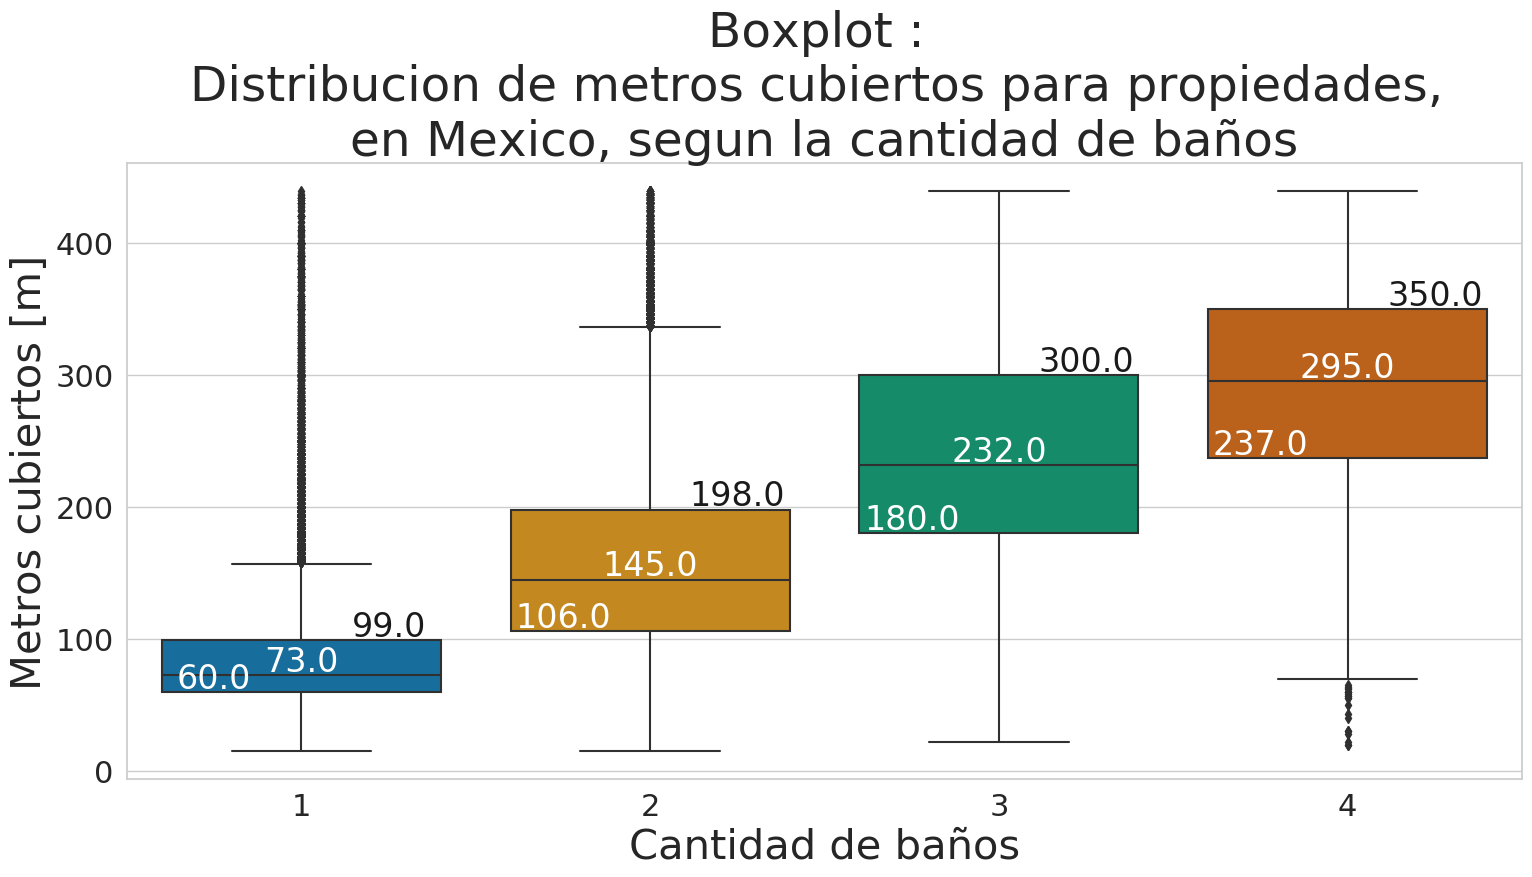

In [18]:
plot_boxplot_banos_metroscubiertos = sns.boxplot(
                                            x = 'banos',
                                            y = 'metroscubiertos',
                                            data = zona_banos_metroscubiertos,
                                            palette = COLORES_BARRAS
                                        )

# Titulos
setear_titulos_plot(
    plot_boxplot_banos_metroscubiertos,
    'Boxplot : \nDistribucion de metros cubiertos para propiedades, \nen Mexico, segun la cantidad de baños',
    'Cantidad de baños',
    'Metros cubiertos [m]'
)

# Agrego cuantiles y medianas
agregar_serie_boxplot(
    plot_boxplot_banos_metroscubiertos,
    banos_agrupados_metroscubiertos_estadisticas['metroscubiertos_cuantil_1'],
    'w',
    -0.25, 3
)

agregar_serie_boxplot(
    plot_boxplot_banos_metroscubiertos,
    banos_agrupados_metroscubiertos_estadisticas['metroscubiertos_median'],
    'w',
    0, 3
)

agregar_serie_boxplot(
    plot_boxplot_banos_metroscubiertos,
    banos_agrupados_metroscubiertos_estadisticas['metroscubiertos_cuantil_3'],
    'k',
    0.25, 3
)

plt.show()

Vemos que la cantidad de metros cubiertos para propiedades de un solo baño varia poco.  
Por otro lado propieadades con 3 o 4 baños tienen mas variacion mayor en los metros cubiertos.

## Banos - Metrostotales

### ¿Que ese metrostotales?

In [19]:
zona_banos['metrostotales'].unique()

array([ 80., 180., 166.,  67.,  95.,  90., 160., 293.,  nan, 141., 231.,
       250., 275., 184., 150., 224., 260.,  98.,  66., 306., 196., 355.,
       300., 350., 216., 145., 200., 100., 170.,  84., 110.,  70., 140.,
       128., 233.,  68.,  47., 190.,  61., 167., 132.,  64., 385., 340.,
       215., 330., 122., 204., 120., 135., 210., 183., 325., 163.,  39.,
       191.,  83., 408., 121., 400., 144.,  75.,  96., 178.,  86.,  60.,
        85., 220.,  50., 153., 189., 421., 125., 151., 105., 155., 257.,
       256., 168., 268., 349., 126.,  49., 112., 273., 130., 198., 131.,
       115., 248.,  88., 246., 113., 304., 394., 154.,  59.,  63., 208.,
        58., 244., 117., 127.,  53., 226., 108., 146., 309., 415.,  72.,
       240.,  55., 420., 107.,  71., 367., 197., 138., 230., 142.,  97.,
        89., 320., 162., 290., 137., 251., 119., 123., 136., 271., 158.,
        74., 109., 390.,  65.,  30., 302., 218., 214., 313., 102.,  99.,
       104.,  62., 249., 243., 165., 169., 195., 19

In [20]:
zona_banos['metrostotales'].dtype

dtype('float16')

### ¿Cuantos metrostotales son NaN?

In [21]:
cant_metrostotales_nan = zona_banos['metrostotales'].isnull().sum()
cant_metrostotales_nan

46376

### ¿Cuantos datos perdemos si descartamos tambien metrostotales NaN?

In [22]:
(cant_banos_nan + cant_metrostotales_nan) / zona_prop.shape[0]

0.3024875

Perdemos aprox. el 30 % de los datos.

In [23]:
zona_banos_metrostotales = zona_banos.copy()
zona_banos_metrostotales = zona_banos_metrostotales.dropna(subset = ['metrostotales'])
zona_banos_metrostotales['metrostotales'].isnull().sum()

0

### ¿Cual es la distribucion de metros totales de las propiedades, en Mexico, segun la cantidad de baños?

In [24]:
banos_agrupados_metrostotales_estadisticas = zona_banos_metrostotales.groupby(['banos']).agg({'metrostotales' : [cuantil_1, 'median', cuantil_3]})
banos_agrupados_metrostotales_estadisticas.columns = \
    banos_agrupados_metrostotales_estadisticas.columns.get_level_values(0) \
    + '_' + \
    banos_agrupados_metrostotales_estadisticas.columns.get_level_values(1)
banos_agrupados_metrostotales_estadisticas.reset_index(inplace = True)
banos_agrupados_metrostotales_estadisticas

,banos,metrostotales_cuantil_1,metrostotales_median,metrostotales_cuantil_3
0,1,66.00,90.00,124.00
1,2,106.00,142.00,200.00
2,3,152.00,203.00,284.00
3,4,190.00,250.00,320.00


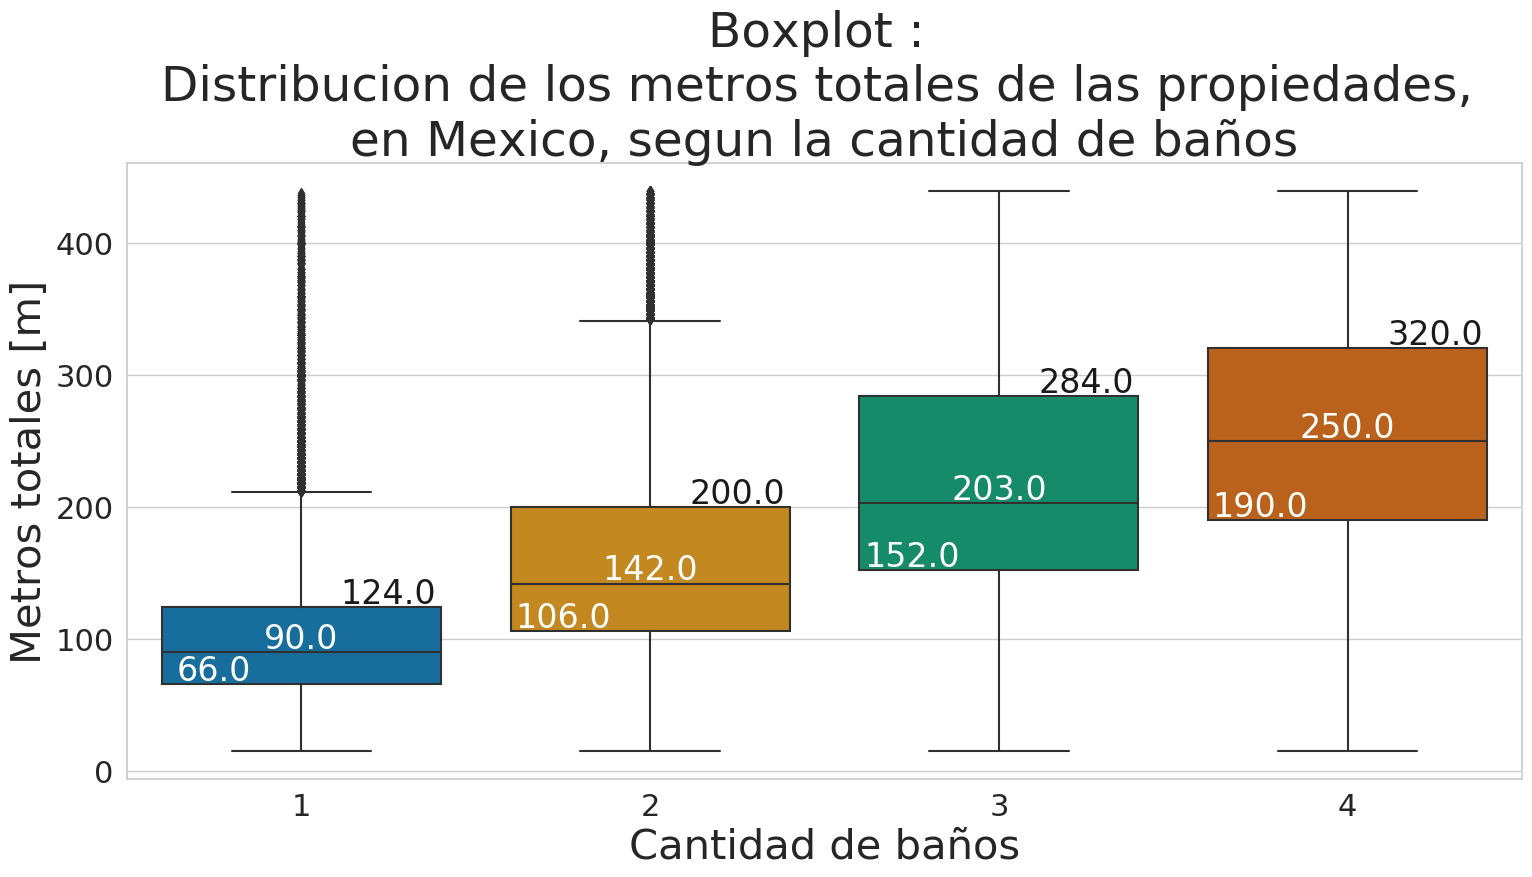

In [25]:
plot_boxplot_banos_metrostotales = sns.boxplot(
                                        x = 'banos',
                                        y = 'metrostotales',
                                        data = zona_banos_metrostotales,
                                        palette = COLORES_BARRAS
                                    )
# Titulos
setear_titulos_plot(
    plot_boxplot_banos_metrostotales,
    'Boxplot : \nDistribucion de los metros totales de las propiedades, \nen Mexico, segun la cantidad de baños',
    'Cantidad de baños',
    'Metros totales [m]'
)

# Agrego cuantiles y medianas
agregar_serie_boxplot(
    plot_boxplot_banos_metrostotales,
    banos_agrupados_metrostotales_estadisticas['metrostotales_cuantil_1'],
    'w',
    -0.25, 3
)

agregar_serie_boxplot(
    plot_boxplot_banos_metrostotales,
    banos_agrupados_metrostotales_estadisticas['metrostotales_median'],
    'w',
    0, 3
)

agregar_serie_boxplot(
    plot_boxplot_banos_metrostotales,
    banos_agrupados_metrostotales_estadisticas['metrostotales_cuantil_3'],
    'k',
    0.25, 3
)

plt.show()

Al igual que en el boxplot banos-metroscubiertos, las propiedades con 1 baño varian poco en metros totales ocupados.  
De la misma, manera, a medida que aumento la cantidad de baños, tambien aumenta la "varianza" de metrostotales de la estas propiedades.

## Banos - Fecha 

### ¿Que es fecha? 

In [26]:
zona_banos['fecha'].unique()

array(['2015-08-23T00:00:00.000000000', '2013-06-28T00:00:00.000000000',
       '2015-10-17T00:00:00.000000000', ...,
       '2012-12-30T00:00:00.000000000', '2014-08-31T18:12:16.000000000',
       '2014-09-30T18:12:16.000000000'], dtype='datetime64[ns]')

In [27]:
zona_banos['fecha'].dtype

dtype('<M8[ns]')

### ¿Cuantos fechas son NaN?

In [28]:
zona_banos['fecha'].isnull().sum()

0

No perdemos datos en el analisis de la relacion con este campo.

### ¿Como evoluciono el porcentaje de propiedades, en Mexico, con baño, segun el año de puesta en venta? 

In [29]:
zona_banos['anio'] = zona_banos['fecha'].dt.year
zona_banos

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,anio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,nan,2.00,1.00,...,nan,nan,2015-08-23,False,False,False,False,False,"2,273,000.00",2015
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.00,3.00,2.00,...,19.31,-99.23,2013-06-28,False,False,False,True,True,"3,600,000.00",2013
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.00,3.00,2.00,...,nan,nan,2015-10-17,False,False,False,False,False,"1,200,000.00",2015
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.00,2.00,1.00,...,19.30,-99.69,2012-03-09,False,False,False,True,True,"650,000.00",2012
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.00,2.00,1.00,...,nan,nan,2016-06-07,False,False,False,False,False,"1,150,000.00",2016
5,126147,departamento en venta taxqueña,"amplio departamento, estancia de sala y comedo...",Apartamento,Condominio Tlalpan 2B,Coyoacán,Distrito Federal,5.00,2.00,1.00,...,19.30,-99.15,2014-03-18,False,False,False,False,True,"1,100,000.00",2014
6,139233,de oportunidad casa en san lorenzo,"ubicada en esquina, pertenece san lorenzo agen...",Casa,NaN,Oaxaca de Juárez,Oaxaca,nan,3.00,1.00,...,17.14,-96.80,2016-02-23,False,False,False,False,False,"1,150,000.00",2016
7,5013,casa emilia en venta en selvamar playa del carmen,casa emilia en venta playa del carmenfracciona...,Casa,condominio el trebol,Playa del Carmen,Quintana Roo,2.00,4.00,2.00,...,20.67,-87.04,2016-10-20,False,False,False,False,False,"4,200,000.00",2016
8,44962,pre- venta preciosos depas 2 recamaras con sub...,<p>pre-venta de preciosos departamento ecologi...,Apartamento,BUENAVISTA DEPTOS CON SUBSIDIO,Villa de Alvarez,Colima,1.00,2.00,1.00,...,nan,nan,2014-01-06,False,False,False,True,True,"310,000.00",2014
10,51180,mi 2° credito,<p>mi 2&deg; credito<br />para todos aquellos ...,Casa,MI 2° CREDITO,San Luis Potosí,San luis Potosí,0.00,3.00,1.00,...,22.20,-101.02,2013-01-03,False,False,False,True,True,"488,000.00",2013


In [30]:
anio_agrupado_banos_porcentaje = zona_banos.groupby(['anio'])['banos'].apply(value_counts_normalize_porcentual)
anio_agrupado_banos_porcentaje = anio_agrupado_banos_porcentaje.to_frame()
anio_agrupado_banos_porcentaje.columns = ['porcentaje_propiedades']
anio_agrupado_banos_porcentaje.reset_index(inplace = True)
anio_agrupado_banos_porcentaje.columns = ['anio', 'banos', 'porcentaje_propiedades']
anio_agrupado_banos_porcentaje

,anio,banos,porcentaje_propiedades
0,2012,2,40.65
1,2012,1,31.29
2,2012,3,21.02
3,2012,4,7.04
4,2013,2,41.33
5,2013,1,30.82
6,2013,3,20.86
7,2013,4,6.99
8,2014,2,40.67
9,2014,1,27.76


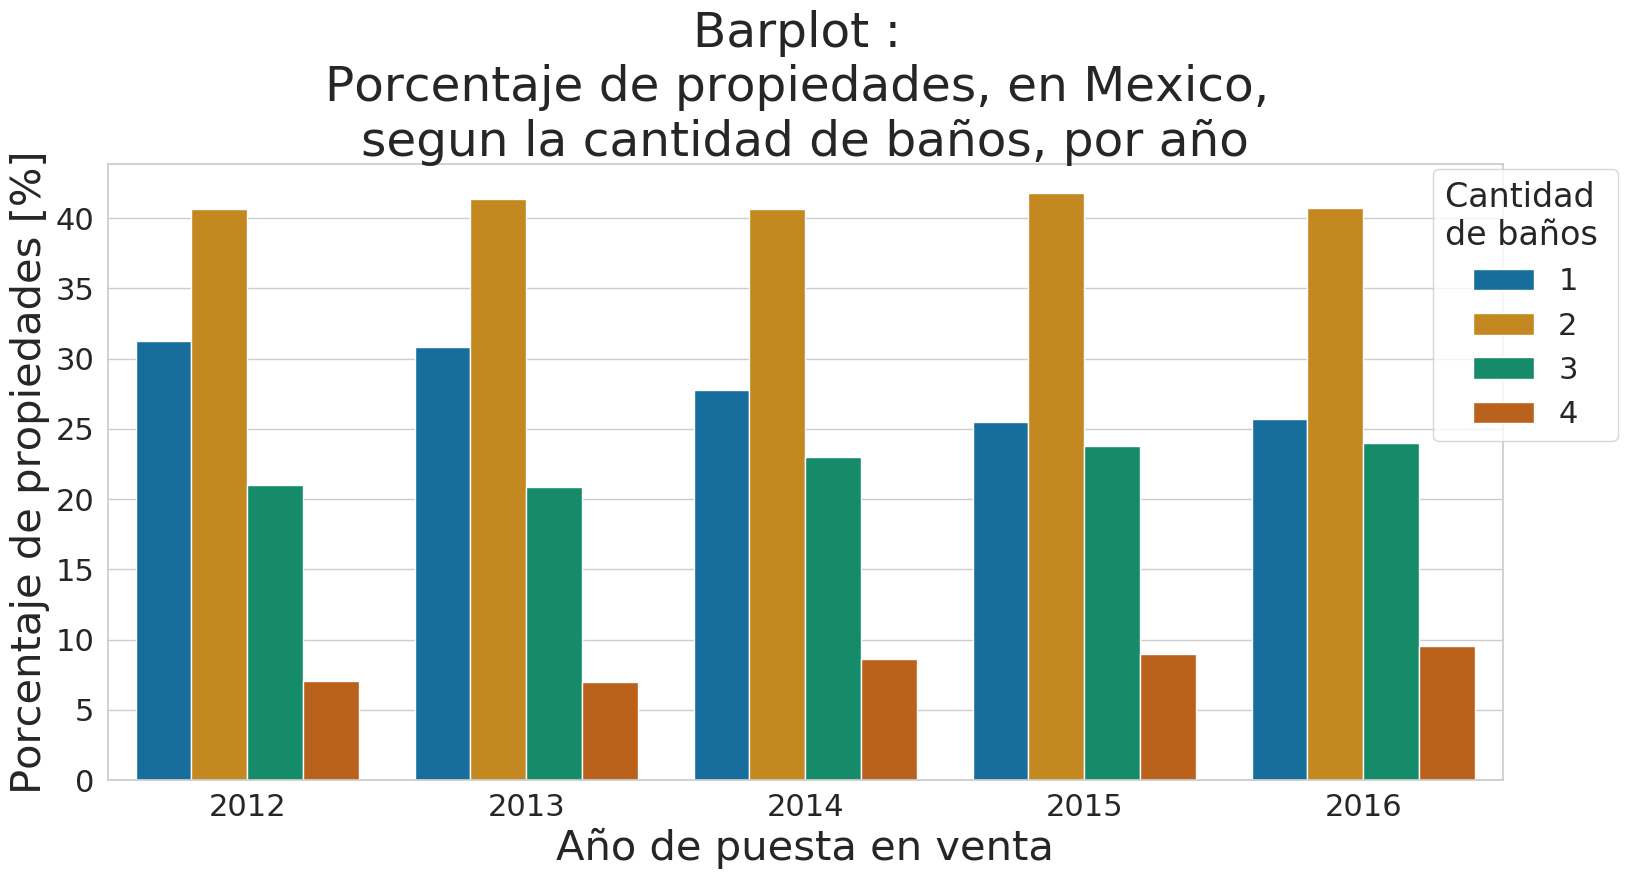

In [31]:
plot_barplot_banos_anio_porcentaje = sns.barplot(
                                        x = 'anio',
                                        y = 'porcentaje_propiedades',
                                        hue = 'banos',
                                        data = anio_agrupado_banos_porcentaje,
                                        palette = COLORES_BARRAS
                                    )
#Titulos
setear_titulos_plot(
    plot_barplot_banos_anio_porcentaje,
    'Barplot : \nPorcentaje de propiedades, en Mexico, \nsegun la cantidad de baños, por año',
    'Año de puesta en venta',
    'Porcentaje de propiedades [%]'
)

plot_barplot_banos_anio_porcentaje.legend(title = 'Cantidad \nde baños', loc = [0.95,0.55])

plt.show()

In [32]:
anio_banos_porcentaje_pivot = anio_agrupado_banos_porcentaje.pivot_table(index = 'banos', columns = 'anio', values = 'porcentaje_propiedades')
anio_banos_porcentaje_pivot

anio,2012,2013,2014,2015,2016
banos,,,,,
1,31.29,30.82,27.76,25.48,25.71
2,40.65,41.33,40.67,41.76,40.75
3,21.02,20.86,22.97,23.78,24.02
4,7.04,6.99,8.60,8.97,9.53


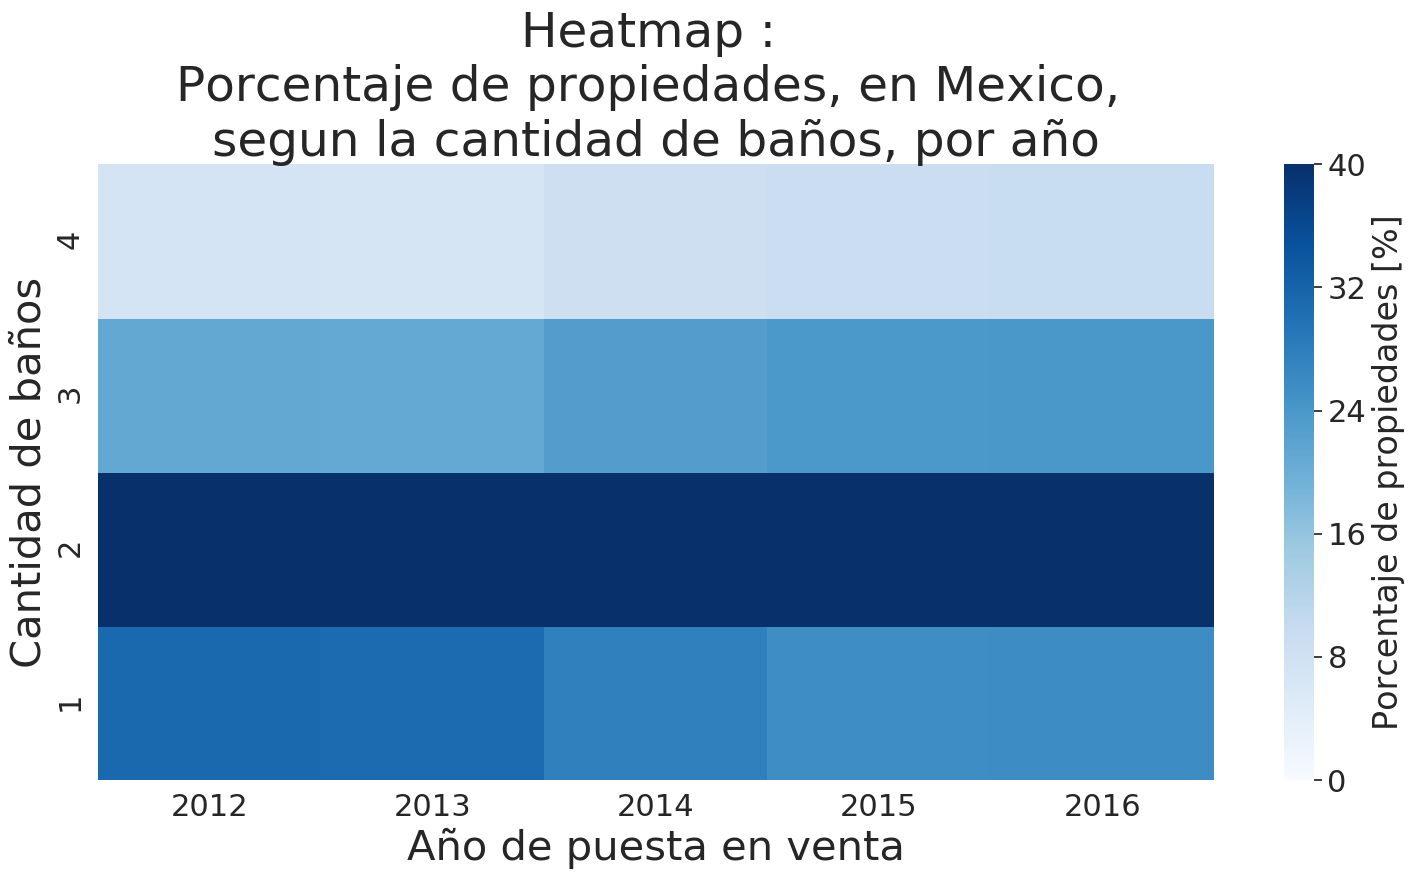

In [33]:
plot_heatmap_banos_anio_porcentaje = sns.heatmap(
                                        anio_banos_porcentaje_pivot,
                                        cmap = 'Blues',
                                        vmin = 0,
                                        vmax = 40,
                                        cbar_kws={'label': 'Porcentaje de propiedades [%]'}
                                    )
plot_heatmap_banos_anio_porcentaje.invert_yaxis()

setear_titulos_plot(
    plot_heatmap_banos_anio_porcentaje,
    'Heatmap : \nPorcentaje de propiedades, en Mexico, \nsegun la cantidad de baños, por año',
    'Año de puesta en venta',
    'Cantidad de baños'
)

plt.show()

Otra forma de visualizar la misma informacion que en el grafico de barras.

## Banos - Gimnasio

### ¿Que es gimnasio? 

In [34]:
zona_banos['gimnasio'].unique()

array([False,  True])

In [35]:
zona_banos['gimnasio'].dtype

dtype('bool')

### ¿Cuantos gimnasio son NaN? 

In [36]:
zona_banos['gimnasio'].isnull().sum()

0

No perdemos ningun otro dato.

### ¿Cuantas propiedades, en Mexico, hay segun la cantidad de baños y la presencia de gimnasio?

In [37]:
banos_agrupados_gimnasio_cant = zona_banos.groupby(['banos']).agg({'gimnasio' : 'value_counts'})
banos_agrupados_gimnasio_cant.columns = ['cantidad_propiedades']
banos_agrupados_gimnasio_cant.reset_index(inplace = True)
banos_agrupados_gimnasio_cant.columns = ['banos', 'tiene_gimnasio', 'cantidad_propiedades']
banos_agrupados_gimnasio_cant

,banos,tiene_gimnasio,cantidad_propiedades
0,1,False,56428
1,1,True,1745
2,2,False,81149
3,2,True,6534
4,3,False,44852
5,3,True,4513
6,4,False,16953
7,4,True,1605


In [38]:
banos_gimnasio_cant_para_plot = banos_agrupados_gimnasio_cant.copy()
banos_gimnasio_cant_para_plot['tiene_gimnasio'] = banos_gimnasio_cant_para_plot['tiene_gimnasio'].apply(lambda x: 'Si' if x == True else 'No')
banos_gimnasio_cant_para_plot

,banos,tiene_gimnasio,cantidad_propiedades
0,1,No,56428
1,1,Si,1745
2,2,No,81149
3,2,Si,6534
4,3,No,44852
5,3,Si,4513
6,4,No,16953
7,4,Si,1605


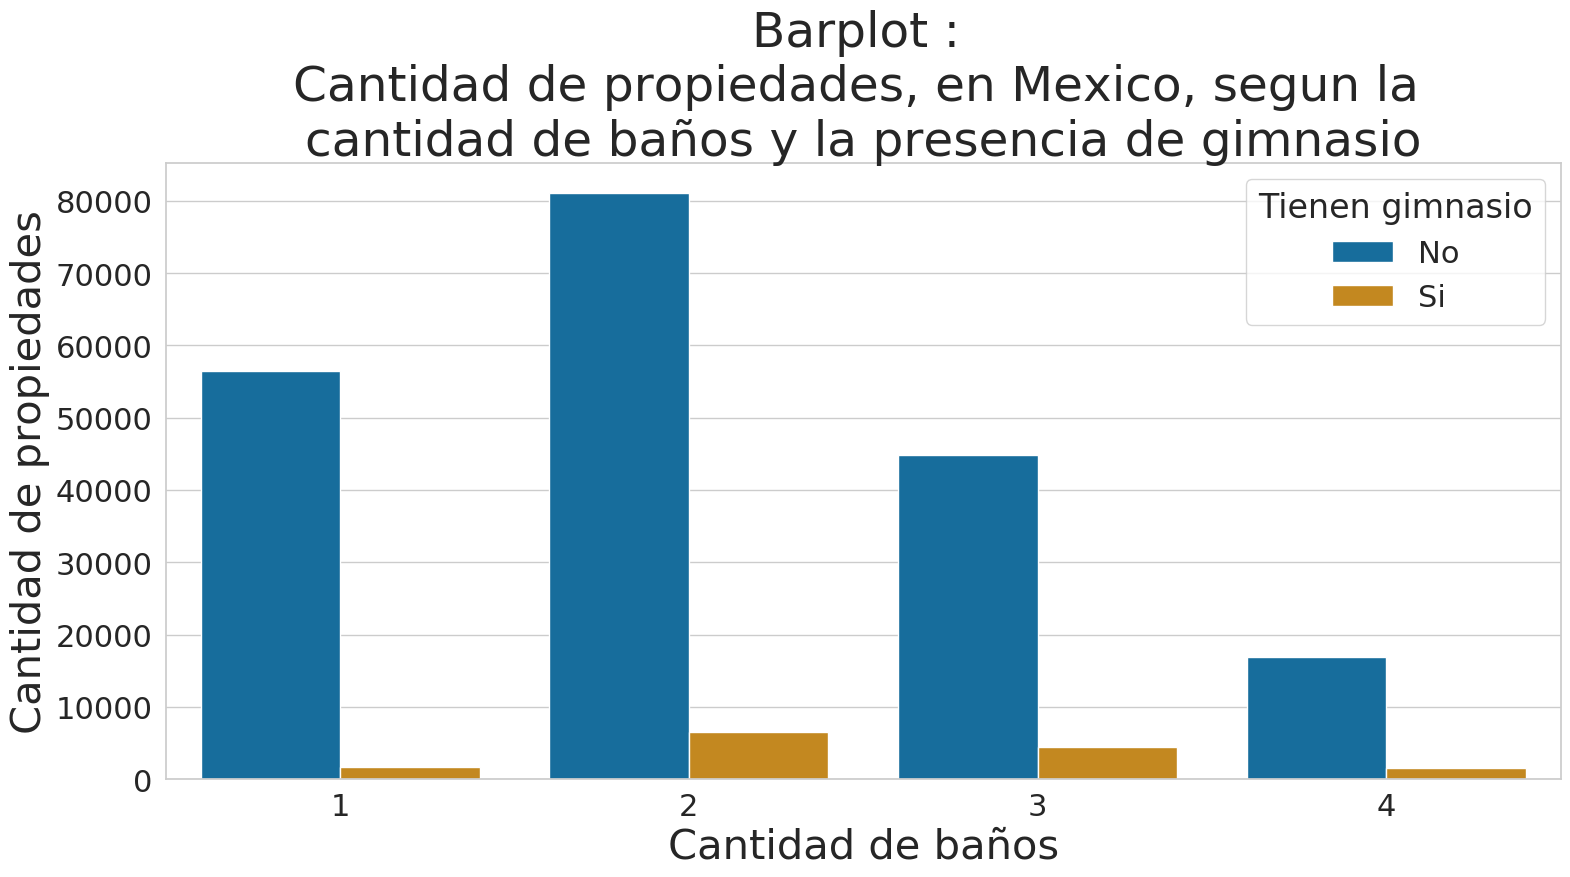

In [39]:
plot_barplot_banos_gimnasio_cant = sns.barplot(
                                x = 'banos',
                                y = 'cantidad_propiedades',
                                hue = 'tiene_gimnasio',
                                data = banos_gimnasio_cant_para_plot,
                                palette = COLORES_BARRAS
                            )
setear_titulos_plot(
    plot_barplot_banos_gimnasio_cant,
    'Barplot : \nCantidad de propiedades, en Mexico, segun la \ncantidad de baños y la presencia de gimnasio',
    'Cantidad de baños',
    'Cantidad de propiedades'
)

plot_barplot_banos_gimnasio_cant.legend(title = 'Tienen gimnasio')

plt.show()


No parece haber una relacion fuerte entre la cantidad de baños y gimnasio, pero intentemos analizarlo desde los porcentajes en el siguiente grafico

In [40]:
banos_agrupados_gimnasio_porcentaje = zona_banos.groupby(['banos'])['gimnasio'].apply(value_counts_normalize_porcentual)
banos_agrupados_gimnasio_porcentaje = banos_agrupados_gimnasio_porcentaje.to_frame()
banos_agrupados_gimnasio_porcentaje.columns = ['porcentaje_propiedades']
banos_agrupados_gimnasio_porcentaje.reset_index(inplace = True)
banos_agrupados_gimnasio_porcentaje.columns = ['banos', 'tiene_gimnasio', 'porcentaje_propiedades']
banos_agrupados_gimnasio_porcentaje

,banos,tiene_gimnasio,porcentaje_propiedades
0,1,False,97.00
1,1,True,3.00
2,2,False,92.55
3,2,True,7.45
4,3,False,90.86
5,3,True,9.14
6,4,False,91.35
7,4,True,8.65


In [41]:
banos_gimnasio_porcentaje_para_plot = banos_agrupados_gimnasio_porcentaje.copy()
banos_gimnasio_porcentaje_para_plot['tiene_gimnasio'] = banos_gimnasio_porcentaje_para_plot['tiene_gimnasio'].apply(lambda x: 'Si' if x == True else 'No')
banos_gimnasio_porcentaje_para_plot

,banos,tiene_gimnasio,porcentaje_propiedades
0,1,No,97.00
1,1,Si,3.00
2,2,No,92.55
3,2,Si,7.45
4,3,No,90.86
5,3,Si,9.14
6,4,No,91.35
7,4,Si,8.65


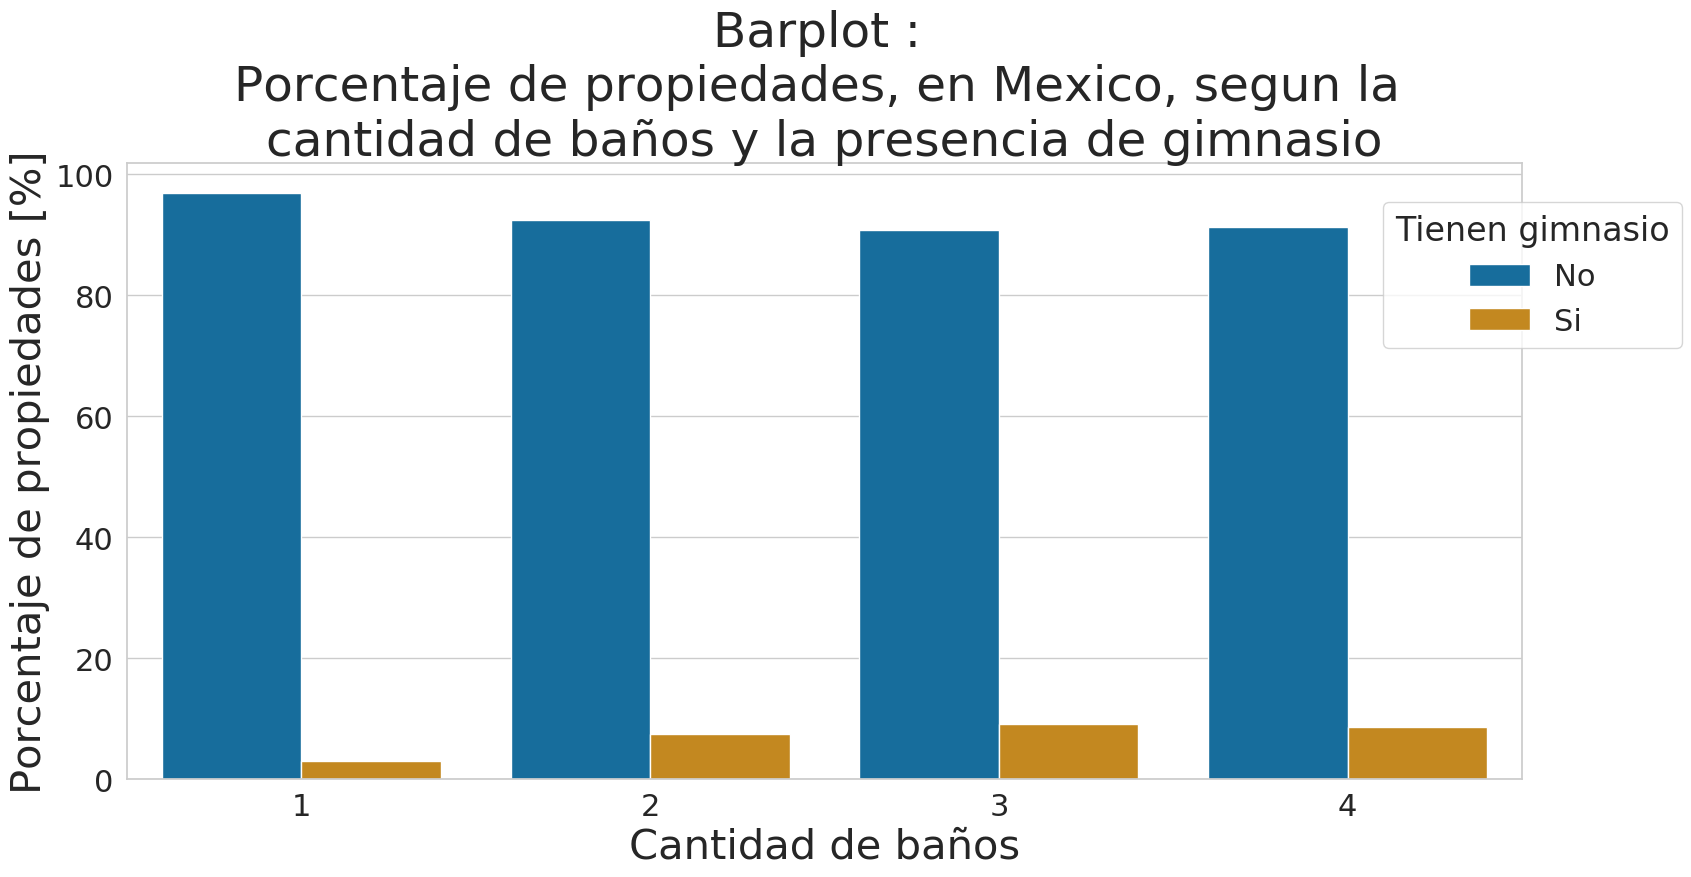

In [42]:
plot_barplot_banos_gimnasio_porcentaje = sns.barplot(
                                            x = 'banos',
                                            y = 'porcentaje_propiedades',
                                            hue = 'tiene_gimnasio',
                                            data = banos_gimnasio_porcentaje_para_plot,
                                            palette = COLORES_BARRAS
                                        )

setear_titulos_plot(
    plot_barplot_banos_gimnasio_porcentaje,
    'Barplot : \nPorcentaje de propiedades, en Mexico, segun la \ncantidad de baños y la presencia de gimnasio',
    'Cantidad de baños',
    'Porcentaje de propiedades [%]'
)

plot_barplot_banos_gimnasio_porcentaje.legend(title = 'Tienen gimnasio', loc = [0.9, 0.7])

plt.show()

En este grafico se aprecia mas que el porcentaje de propiedades con 1 baños y sin gimnasio es mayor que la 4 baños, por ejemplo.

## Banos - Usosmultiples 

###  ¿Que es usosmultiples?

In [43]:
zona_banos['usosmultiples'].unique()

array([False,  True])

In [44]:
zona_banos['usosmultiples'].dtype

dtype('bool')

### ¿Cuantos usosmultiples son NaN?

In [46]:
zona_banos['usosmultiples'].isnull().sum()

0

No perdemos ningun dato mas.

### ¿Cual es el porcentaje de propiedades, en Mexico, segun la cantidad de baños y la presencia de usosmultiples? 

In [47]:
banos_agrupados_usosmultiples_porcentaje = zona_banos.groupby(['banos'])['usosmultiples'].apply(value_counts_normalize_porcentual)
banos_agrupados_usosmultiples_porcentaje = banos_agrupados_usosmultiples_porcentaje.to_frame()
banos_agrupados_usosmultiples_porcentaje.columns = ['porcentaje_propiedades']
banos_agrupados_usosmultiples_porcentaje.reset_index(inplace = True)
banos_agrupados_usosmultiples_porcentaje.columns = ['banos','tiene_usosmultiples', 'porcentaje_propiedades']
banos_agrupados_usosmultiples_porcentaje

,banos,tiene_usosmultiples,porcentaje_propiedades
0,1,False,97.87
1,1,True,2.13
2,2,False,93.60
3,2,True,6.40
4,3,False,91.59
5,3,True,8.41
6,4,False,91.22
7,4,True,8.78


In [48]:
banos_usosmultiples_porcentaje_para_plot = banos_agrupados_usosmultiples_porcentaje.copy()
banos_usosmultiples_porcentaje_para_plot['tiene_usosmultiples'] = banos_usosmultiples_porcentaje_para_plot['tiene_usosmultiples'].apply(lambda x: 'Si' if x == True else 'No')
banos_usosmultiples_porcentaje_para_plot

,banos,tiene_usosmultiples,porcentaje_propiedades
0,1,No,97.87
1,1,Si,2.13
2,2,No,93.60
3,2,Si,6.40
4,3,No,91.59
5,3,Si,8.41
6,4,No,91.22
7,4,Si,8.78


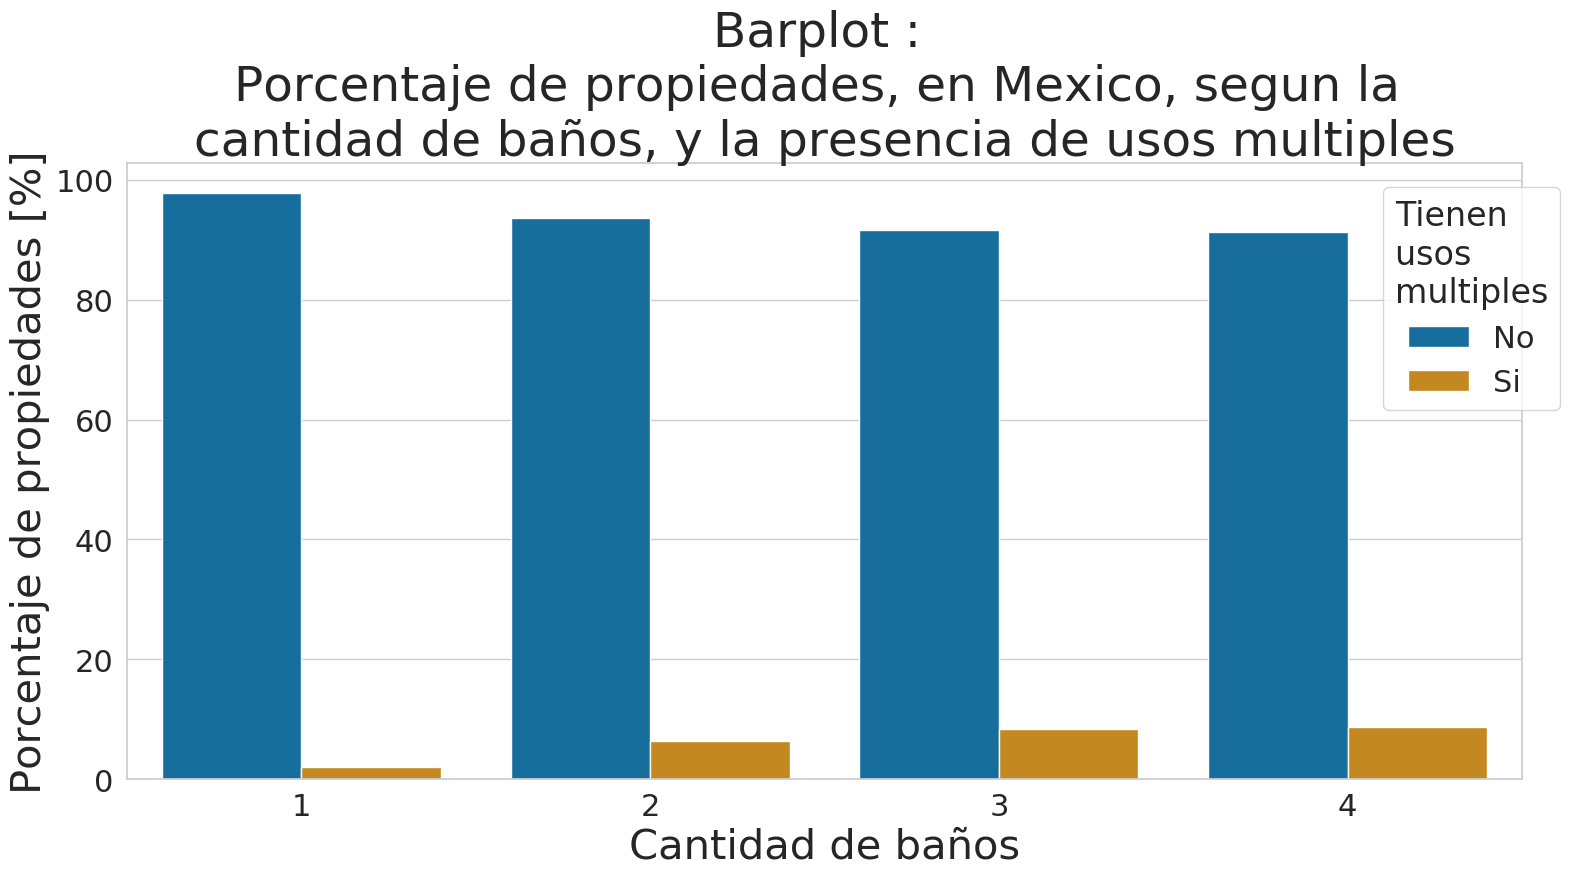

In [49]:
plot_barplot_banos_usosmultiples_porcentaje = sns.barplot(
                                                x = 'banos',
                                                y = 'porcentaje_propiedades',
                                                hue = 'tiene_usosmultiples',
                                                data = banos_usosmultiples_porcentaje_para_plot,
                                                palette = COLORES_BARRAS
                                            )
setear_titulos_plot(
    plot_barplot_banos_usosmultiples_porcentaje,
    'Barplot : \nPorcentaje de propiedades, en Mexico, segun la \ncantidad de baños, y la presencia de usos multiples',
    'Cantidad de baños',
    'Porcentaje de propiedades [%]'
)

plot_barplot_banos_usosmultiples_porcentaje.legend(title = 'Tienen \nusos \nmultiples', loc = [0.9, 0.6])

plt.show()

## Banos - Piscina 

### ¿Que es piscina? 

In [51]:
zona_banos['piscina'].unique()

array([False,  True])

In [52]:
zona_banos['piscina'].dtype

dtype('bool')

### ¿Cuantas piscina son NaN? 

In [53]:
zona_banos['piscina'].isnull().sum()

0

### ¿Cual es el porcentaje de propidades, en Mexico, segun la cantidad de baños y la presencia de piscina? 

In [55]:
banos_agrupados_piscina_porcentaje = zona_banos.groupby(['banos'])['piscina'].apply(value_counts_normalize_porcentual)
banos_agrupados_piscina_porcentaje = banos_agrupados_piscina_porcentaje.to_frame()
banos_agrupados_piscina_porcentaje.columns = ['porcentaje_propiedades']
banos_agrupados_piscina_porcentaje.reset_index(inplace = True)
banos_agrupados_piscina_porcentaje.columns = ['banos', 'tiene_piscina', 'porcentaje_propiedades']
banos_agrupados_piscina_porcentaje

,banos,tiene_piscina,porcentaje_propiedades
0,1,False,96.75
1,1,True,3.25
2,2,False,90.32
3,2,True,9.68
4,3,False,86.65
5,3,True,13.35
6,4,False,86.48
7,4,True,13.52


In [56]:
banos_piscina_porcentaje_para_plot = banos_agrupados_piscina_porcentaje.copy()
banos_piscina_porcentaje_para_plot['tiene_piscina'] = banos_piscina_porcentaje_para_plot['tiene_piscina'].apply(lambda x: 'Si' if x == True else 'No')
banos_piscina_porcentaje_para_plot

,banos,tiene_piscina,porcentaje_propiedades
0,1,No,96.75
1,1,Si,3.25
2,2,No,90.32
3,2,Si,9.68
4,3,No,86.65
5,3,Si,13.35
6,4,No,86.48
7,4,Si,13.52


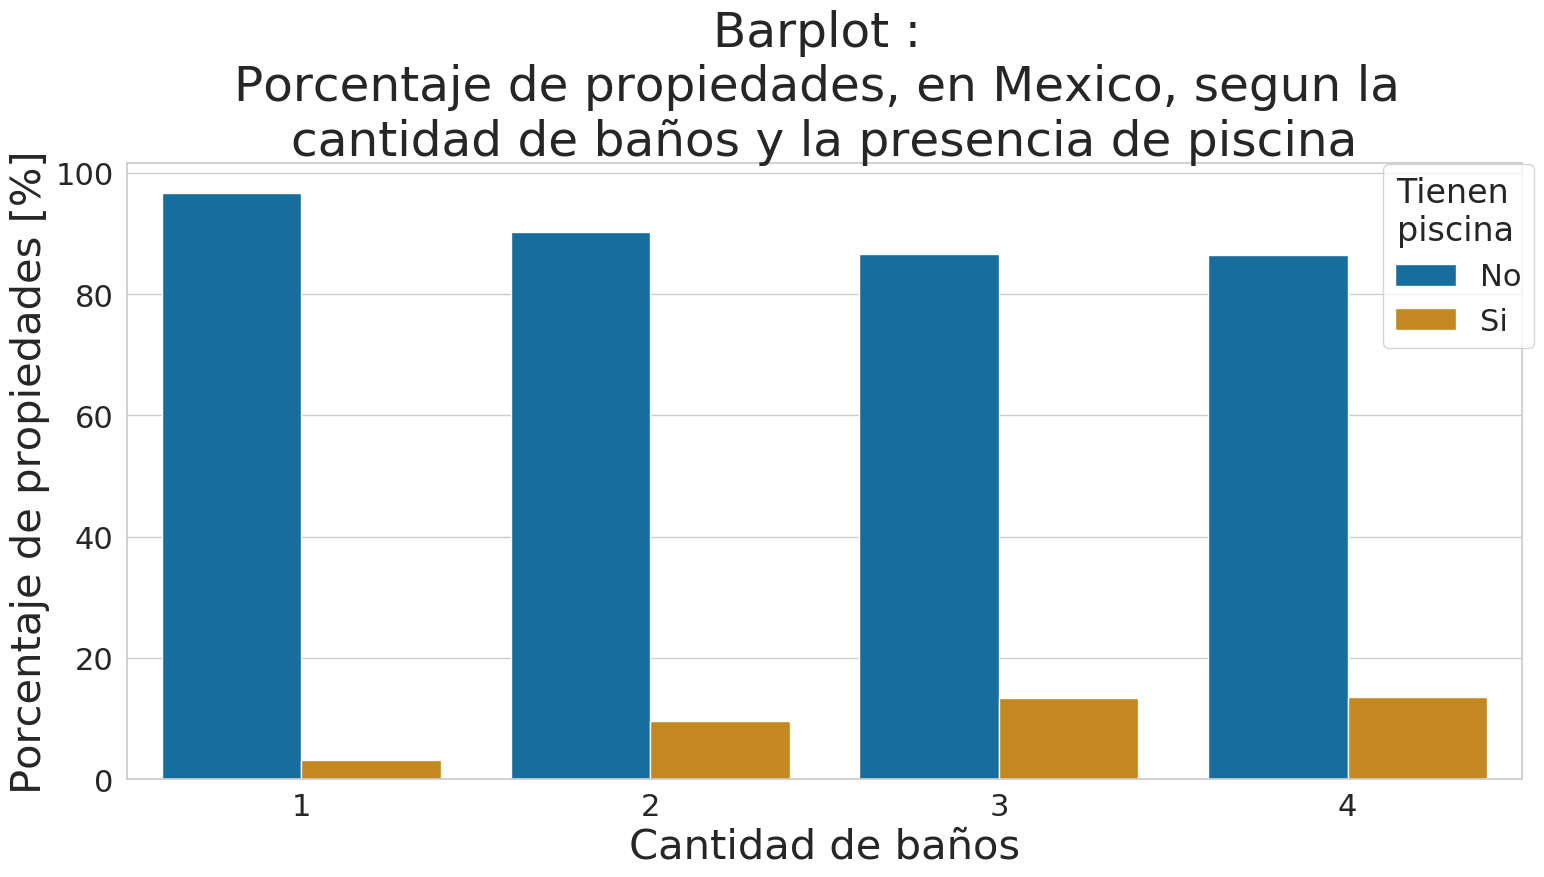

In [64]:
plot_barplot_banos_piscina_porcentaje = sns.barplot(
                                            x = 'banos',
                                            y = 'porcentaje_propiedades',
                                            hue = 'tiene_piscina',
                                            data = banos_piscina_porcentaje_para_plot,
                                            palette = COLORES_BARRAS
                                        )
setear_titulos_plot(
    plot_barplot_banos_piscina_porcentaje,
    'Barplot : \nPorcentaje de propiedades, en Mexico, segun la \ncantidad de baños y la presencia de piscina',
    'Cantidad de baños',
    'Porcentaje de propiedades [%]'
)

plot_barplot_banos_piscina_porcentaje.legend(title = 'Tienen \npiscina', loc = [0.9, 0.7])

plt.show()

A diferencia de graficos anteriores hay un porcentaje levemente mayor de propiedades con 3 y/o 4 baños y con piscina.

## Banos - Escuelascercanas 

### ¿Que es escuelascercanas?

In [65]:
zona_banos['escuelascercanas'].unique()

array([False,  True])

In [66]:
zona_banos['escuelascercanas'].dtype

dtype('bool')

### ¿Cuantas escuelascercanas son NaN? 

In [67]:
zona_banos['escuelascercanas'].isnull().sum()

0

No perdemos mas datos.

### ¿Cual es el porcentaje de propiedades, en Mexico, segun la cantidad de baños y la presencia de escuelas cercanas? 

In [71]:
banos_agrupados_escuelascercanas_porcentaje = zona_banos.groupby(['banos'])['escuelascercanas'].apply(value_counts_normalize_porcentual)
banos_agrupados_escuelascercanas_porcentaje = banos_agrupados_escuelascercanas_porcentaje.to_frame()
banos_agrupados_escuelascercanas_porcentaje.columns = ['porcentaje_propiedades']
banos_agrupados_escuelascercanas_porcentaje.reset_index(inplace = True)
banos_agrupados_escuelascercanas_porcentaje.columns = ['banos','tiene_escuelascercanas', 'porcentaje_propiedades']
banos_agrupados_escuelascercanas_porcentaje

,banos,tiene_escuelascercanas,porcentaje_propiedades
0,1,False,53.06
1,1,True,46.94
2,2,False,53.06
3,2,True,46.94
4,3,False,54.93
5,3,True,45.07
6,4,False,56.87
7,4,True,43.13


In [72]:
banos_escuelascercanas_porcentaje_para_plot = banos_agrupados_escuelascercanas_porcentaje.copy()
banos_escuelascercanas_porcentaje_para_plot['tiene_escuelascercanas'] = banos_escuelascercanas_porcentaje_para_plot['tiene_escuelascercanas'].apply(lambda x: 'Si' if x == True else 'No') 
banos_escuelascercanas_porcentaje_para_plot

,banos,tiene_escuelascercanas,porcentaje_propiedades
0,1,No,53.06
1,1,Si,46.94
2,2,No,53.06
3,2,Si,46.94
4,3,No,54.93
5,3,Si,45.07
6,4,No,56.87
7,4,Si,43.13


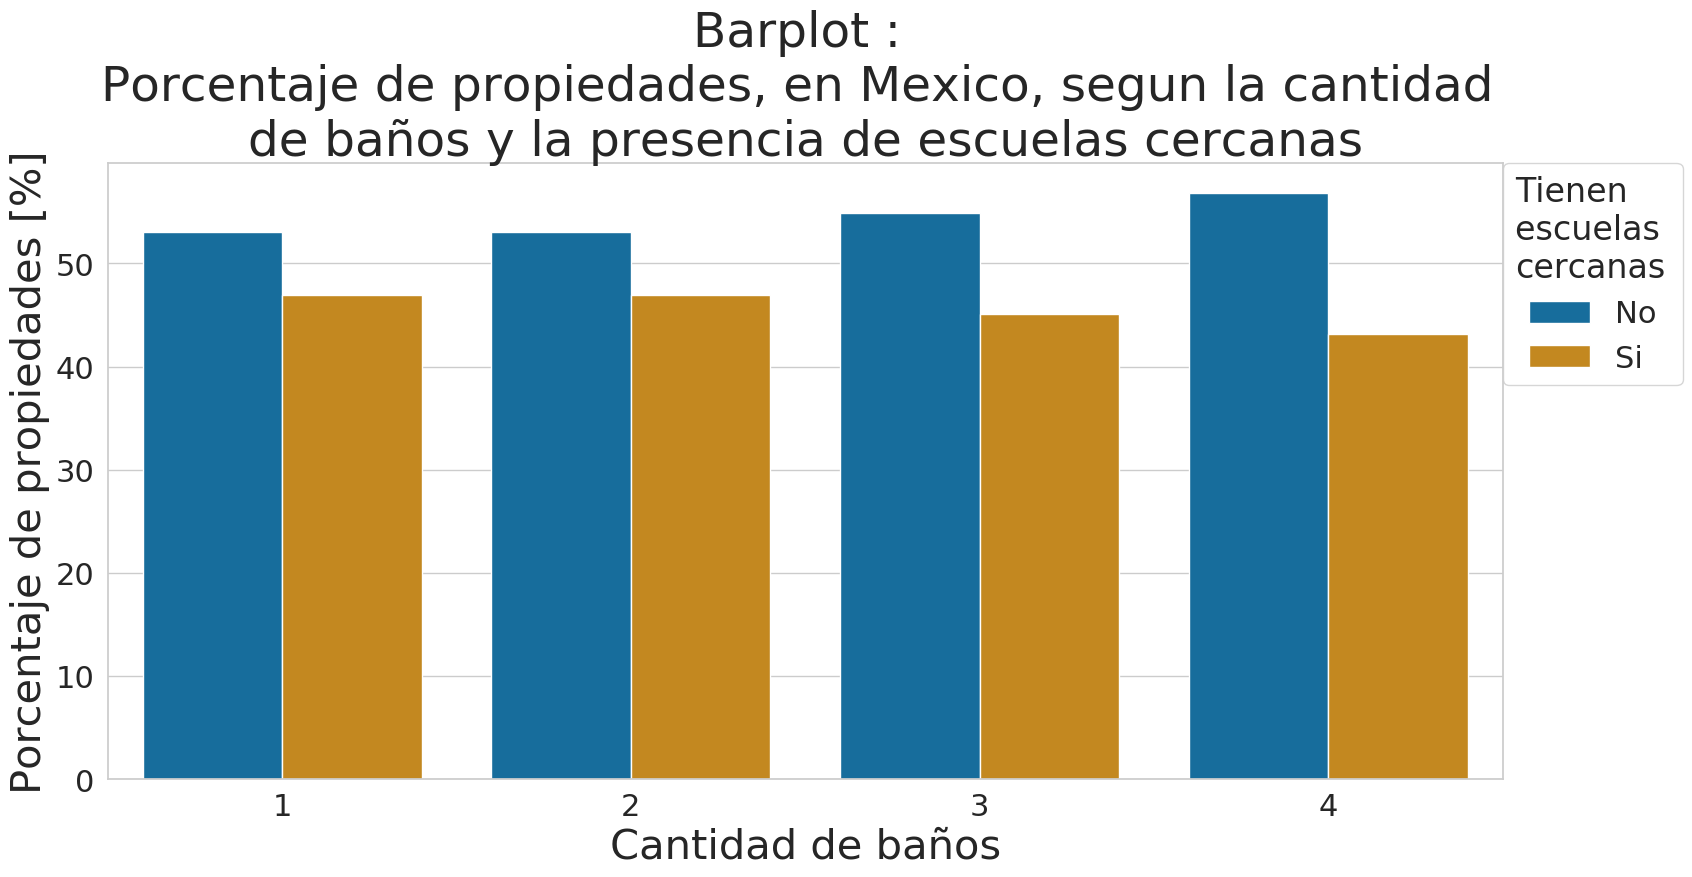

In [78]:
plot_barplot_banos_escuelascercanas_porcentaje = sns.barplot(
                                                    x = 'banos',
                                                    y = 'porcentaje_propiedades',
                                                    hue = 'tiene_escuelascercanas',
                                                    data = banos_escuelascercanas_porcentaje_para_plot,
                                                    palette = COLORES_BARRAS
                                                )
setear_titulos_plot(
    plot_barplot_banos_escuelascercanas_porcentaje,
    'Barplot : \nPorcentaje de propiedades, en Mexico, segun la cantidad \nde baños y la presencia de escuelas cercanas',
    'Cantidad de baños',
    'Porcentaje de propiedades [%]'
)

plot_barplot_banos_escuelascercanas_porcentaje.legend(title = 'Tienen \nescuelas \ncercanas', loc = [1, 0.64])

plt.show()